In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.colors as mcolors

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd

def plot_two_side_by_side(plot_df1, plot_df2, title1="", title2="", suptitle=""):
    # Shared style
    plt.rcParams.update({
        "font.family": "sans-serif",
        "font.sans-serif": ["Arial", "Helvetica", "DejaVu Sans"],
        "axes.titlesize": 16,
        "axes.labelsize": 13,
        "xtick.labelsize": 11,
        "ytick.labelsize": 11,
        "legend.fontsize": 10,
        "legend.title_fontsize": 11
    })

    background_color = "#f0e8dd"
    grid_color = "#cccccc"

    fig, axes = plt.subplots(1, 2, figsize=(14, 6), facecolor=background_color)
    for ax in axes:
        ax.set_facecolor(background_color)

    color_map = {
        'muMLP': '#a63603',
        'SPMLP': '#3182bd',
    }

    def plot_single(ax, plot_df, title):

        sub_keys = sorted(set(col[2] for col in plot_df.columns))
        subkey_ints = {k: int(''.join(filter(str.isdigit, k))) for k in sub_keys}
        norm = mcolors.Normalize(vmin=min(subkey_ints.values()), vmax=max(subkey_ints.values()))

        for col in plot_df.columns:
            model_name, opt_str, size_str = col
            base_color = color_map[model_name]
            width = subkey_ints[size_str]

            rgb = mcolors.to_rgb(base_color)
            hsv = mcolors.rgb_to_hsv(rgb)
            hsv[2] = norm(width) * 0.35 + 0.65
            bright_color = mcolors.hsv_to_rgb(hsv)

            label = f"{model_name} {size_str}"
            plot_df[col].dropna().sort_index().plot(ax=ax, label=label, color=bright_color, linewidth=2.2)

        ax.set_title(title, weight='bold', pad=10)
        ax.set_xlabel("log₂(Learning Rate)")
        ax.set_ylabel("Training Loss (log scale)")
        ax.set_yscale('log')
        ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.6, color=grid_color, alpha=0.7)
        ax.legend(title="Model Variant", loc='best', frameon=False)

    plot_single(axes[0], plot_df1, title1)
    plot_single(axes[1], plot_df2, title2)

    fig.suptitle(suptitle, fontsize=18, weight='bold')
    plt.tight_layout()
    plt.show()


def plot(plot_df):
    # Font and layout
    plt.rcParams.update({
        "font.family": "sans-serif",
        "font.sans-serif": ["Arial", "Helvetica", "DejaVu Sans"],
        "axes.titlesize": 18,
        "axes.labelsize": 14,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "legend.fontsize": 11,
        "legend.title_fontsize": 12
    })

    # Visual style colors
    background_color = "#f0e8dd"
    grid_color = "#cccccc"

    fig, ax = plt.subplots(figsize=(10, 6), facecolor=background_color)
    ax.set_facecolor(background_color)

    color_map = {
        'muMLP': '#a63603',   # muted burnt orange
        'SPMLP': '#3182bd',   # muted steel blue
        'customMLP': '#9932CC',  # bright purple
    }

    # Normalize sizes for brightness adjustment
    sub_keys = sorted(set(col[2] for col in plot_df.columns))
    subkey_ints = {k: int(''.join(filter(str.isdigit, k))) for k in sub_keys}
    norm = mcolors.Normalize(vmin=min(subkey_ints.values()), vmax=max(subkey_ints.values()))

    for col in plot_df.columns:
        model_name, opt_str, size_str = col
        base_color = color_map[model_name]
        width = subkey_ints[size_str]

        # Apply wider brightness gradient: 0.65 to 1.0
        rgb = mcolors.to_rgb(base_color)
        hsv = mcolors.rgb_to_hsv(rgb)
        hsv[2] = norm(width) * 0.35 + 0.65  # V in HSV ∈ [0.65, 1.0]
        bright_color = mcolors.hsv_to_rgb(hsv)

        label = f"{model_name} {size_str}"
        plot_df[col].dropna().sort_index().plot(ax=ax, label=label, color=bright_color, linewidth=2.2)

    ax.set_title(f"muP vs SP ({opt_str} optimizer)\nTraining Loss vs Learning Rate (CIFAR-10, MLP)", weight='bold', pad=15)
    ax.set_xlabel("log₂(Learning Rate)")
    ax.set_ylabel("Training Loss (log scale)")
    ax.set_yscale('log')

    # Full elegant grid
    ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.6, color=grid_color, alpha=0.7)

    ax.legend(title="Model Variant", loc='best', frameon=False)

    plt.tight_layout()
    plt.show()


def list_files(ext=".csv"):
    files = os.listdir('.')
    print("Files in the current directory:")
    for file in files:
        if file.endswith(ext):
            print(file)

def load_dfs(files):
    dfs = []
    keys = []
    for file in files:
        if file.endswith('.csv'):
            df = pd.read_csv(file, index_col=0)
            model_name = file.split('_')[-3]
            dataset_name = file.split('_')[-2]
            optimizer_name = file.split('_')[-1].split('.')[0]
            dfs.append(df)
            keys.append((model_name, dataset_name, optimizer_name))
    return pd.concat(dfs, axis=1, keys=keys)

dfs = load_dfs(os.listdir('.'))

In [14]:
# SGD
plot_df = dfs.loc[:, (slice(None), "1.0", "SGD", slice(None))]
plot_df.columns = plot_df.columns.droplevel(1)
plot_df.head()

muMLP                         SPMLP                    
                 SGD                           SGD                    
                 128       256       512       128       256       512
-12.000000  1.858027  1.795572  1.754233  1.844068  1.711316  1.567705
-10.666667  1.727989  1.657051  1.612930  1.783594  1.632587  1.432713
-9.333333   1.594109  1.509087  1.451951  1.709274  1.521878  1.223761
-8.000000   1.449852  1.326493  1.225439  1.617323  1.351132  0.882499
-6.666667   1.261954  1.056268  0.873094  1.543869  1.176849  0.647141

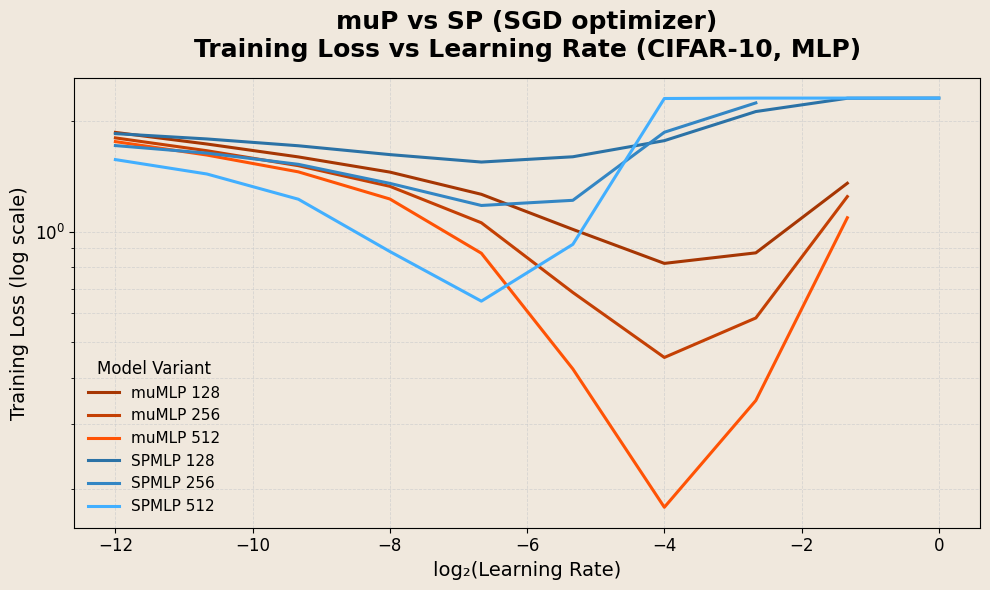

In [15]:
plot(plot_df)

In [16]:
# Adam
plot_df = dfs.loc[:, (slice(None), "1.0", "Adam", slice(None))]
plot_df.columns = plot_df.columns.droplevel(1)
plot_df.head()

KeyError: 'Adam'

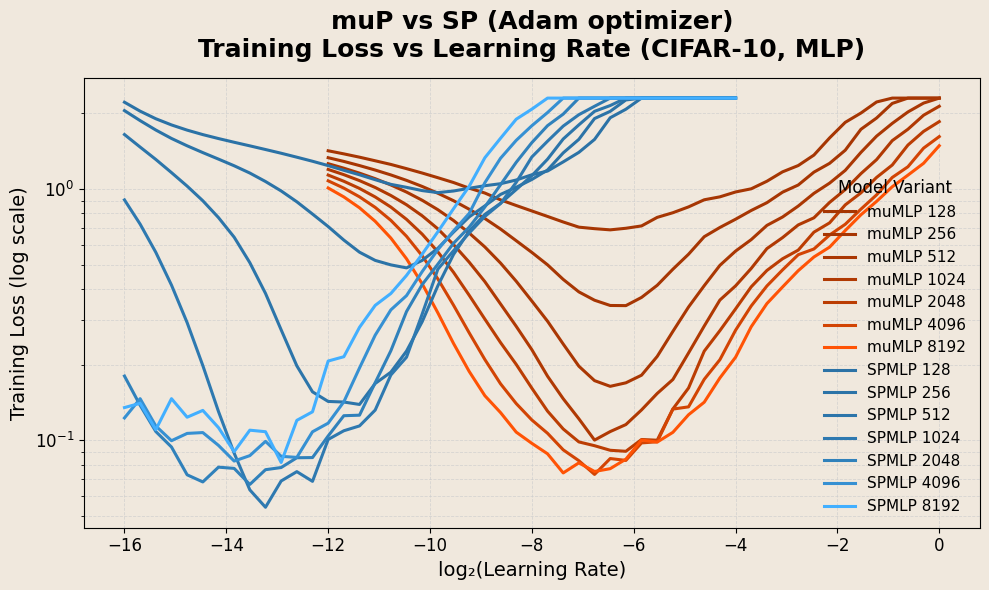

In [34]:
plot(plot_df)

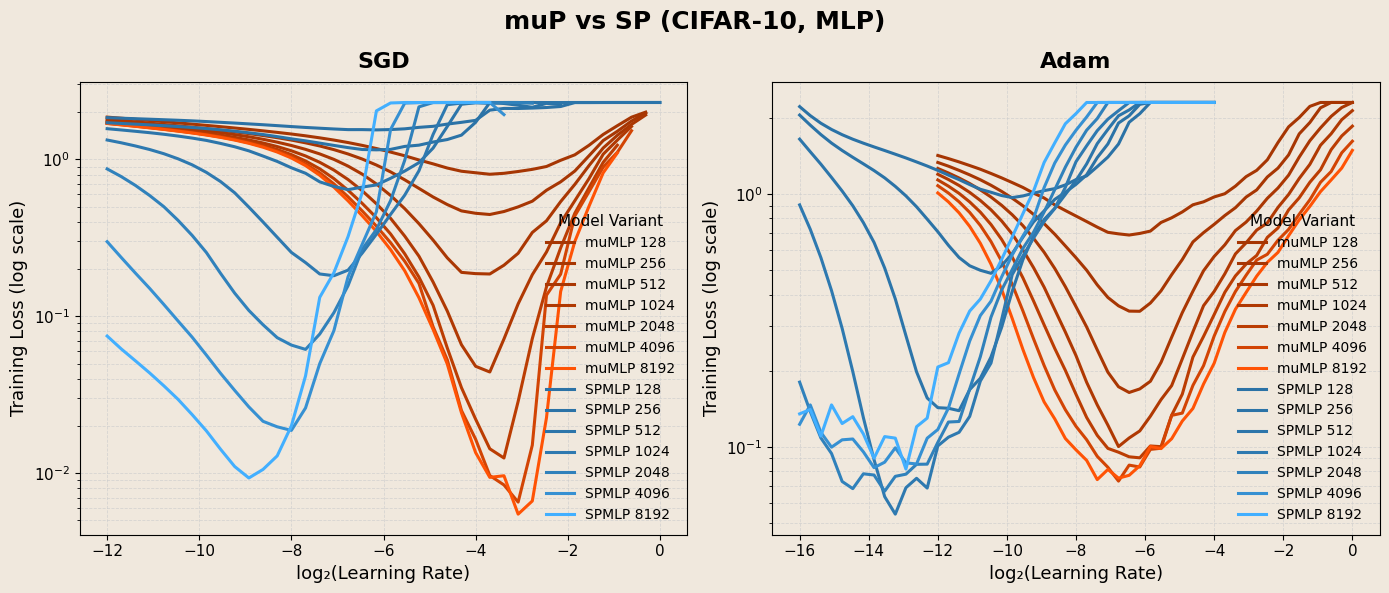

In [35]:
sgd = dfs.loc[:, (slice(None), "1.0", "SGD", slice(None))]
sgd.columns = sgd.columns.droplevel(1)

adam = dfs.loc[:, (slice(None), "1.0", "Adam", slice(None))]
adam.columns = adam.columns.droplevel(1)

plot_two_side_by_side(sgd, adam, title1="SGD", title2="Adam", suptitle="muP vs SP (CIFAR-10, MLP)")